# Author: Alejandro C. Parra Garcia

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Import Data

In [2]:
#The original txt file has been modified, to delete the consecutives duplicates ‘\t’
path="https://github.com/The-Katz-School-at-Yeshiva-University/Neural.Networks.-.Deep.Learn/blob/main/Mini%20Project%201/data/seeds_dataset.txt?raw=true"

In [3]:
#Import the data and create the Columns Names
df = pd.read_csv(path, sep="\t", header=None)
df.columns = ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','class']

### Now, we normalize the data. Using the Min max Scaler, from sklearn

In [4]:
minmax=MinMaxScaler()
p_minmax=minmax.fit_transform(df[['area','perimeter','compactness','length_of_kernel',
                                               'width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']])
df_minmax = pd.DataFrame(p_minmax)
df['area']=df_minmax[0]
df['perimeter']=df_minmax[1]
df['compactness']=df_minmax[2]
df['length_of_kernel']=df_minmax[3]
df['width_of_kernel']=df_minmax[4]
df['asymmetry_coefficient']=df_minmax[5]
df['length_of_kernel_groove']=df_minmax[6]

In [5]:
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,3
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,3
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,3
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


# 2 Create the model functions

## These functions are the ones from the Mini Project 1

In [6]:
#Import the libraries
import numpy as np
from random import seed
from random import random
import math

min=-0.5
max=0.5
seed(1) # Seed For the Random Generator for the Weights

s=1 # Seed For the Split Data

In [7]:
def print_mat(text="",mat=[[]]):
    print(text,end="")
    for x in mat:
        print("\t",x)
    print("")

In [8]:
#Problem 0, Initialize the Weights at random 
def initialize_Weights (x_range,y_range): 
    # Return: dimensions[(x_range) x (y_range)]
    
    mat=[]
    for x in range(x_range):
        vec=[]
        if(x==(x_range-1)):#Last Row
            ran=randomNumber()
            for y in range(y_range):
                vec.append(ran)
        else:#Rest of rowa
            for y in range(y_range):
                vec.append(randomNumber())
        mat.append(vec)
    return mat

#Create nonzero random number between Max and Min
def randomNumber():
    value = min + (random() * (max - min))
    if(value==0):
        value=randomNumber()
    return value

In [9]:
#Problem 1, append to vector a number 1
def append_1(v):
    #v: dimensions: _x1
    
    v_app=[[0 for x in range(len(v[0]))] for y in range(len(v))]#Create the response matrix
    
    for xx, row in enumerate(v):
        for yy, item in enumerate(row):
            v_app[xx][yy]=item
    
    v_app.append([1])
    return v_app

In [10]:
#Problem 2, multiply f_inut and w_input
def multiply_weights (f_input,w_input):
    # ℎ𝑟𝑎𝑤 = 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇 * 𝑊𝑖𝑛𝑝𝑢𝑡
    # f_input: dimensions[(a-1) x 1]
    # w_input: dimensions[(a) x (b)]
    # 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓): dimensions[(a) x 1]
    # 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇:dimensions[1 x (a)]
    
    # ℎ𝑟𝑎𝑤 = 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇 * 𝑊𝑖𝑛𝑝𝑢𝑡
    # ℎ𝑟𝑎𝑤: dimensions[1 x (a) * (a) x (b)]
    # ℎ𝑟𝑎𝑤: dimensions[1 x (b)]
    
    app_f_input=append_1(f_input)# Append 1
    trans_app_f_input=transpose_mat(app_f_input)# Transpose
    result = muliply_mat(trans_app_f_input,w_input)# Multiply
    return result

#transpose a matrix
def transpose_mat(vec):
    # t_vec = (vec)T
    # vec: dimensions[(x) x (y)]
    # (vec)T: dimensions[(y) x (x)]
    
    # t_vec = (vec)T
    # t_vec: dimensions[(y) x (x)]
    
    t_vec=[]
    for y in range(len(vec[0])):
        row=[]
        for x in range(len(vec)):
            row.append(vec[x][y])
        t_vec.append(row)
    return t_vec

#multiply matrix
def muliply_mat(m1,m2):
    # result = m1 * m2
    # m1: dimensions[(a) x (b)]
    # m2: dimensions[(b) x (c)]
    # m1 * m2: dimensions[(a) x (c)]
    
    # result = m1 * m2
    # result: dimensions[(a) x (c)]
    
    #Create a Matrix of 0 with the dimension of the Rowa of "m1" and columns of "m2"
    result=[]
    for x in range(len(m1)):
        row=[]
        for y in range(len(m2[0])):
            row.append(0)
        result.append(row)
    #Multiply
    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                multiply=m1[i][k] * m2[k][j]
                result[i][j] += multiply
    return result

In [11]:
#Problem 3, apply sigmoid function
def apply_sigmoid(h_raw):
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤)
    # ℎ𝑟𝑎𝑤: dimensions[(a) x (b)]
    # 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤): dimensions[(a) x (b)]
    
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤)
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑: dimensions[(a) x (b)]
    
    h_activated=[[0 for x in range(len(h_raw[0]))] for y in range(len(h_raw))]#Create the response matrix
    for x, row in enumerate(h_raw):
        for y, item in enumerate(row):
            h_activated[x][y]=sigmoid(item)
    return h_activated
            
def sigmoid(item):
    return (1/(1+(math.exp( 0-item ))))

In [12]:
#Problem 4, calculate the Error
def calculate_E(o_activated,t):
    #E = 0.5 * (o_activated-t)T * (o_activated-t)
    
    diff=subtraction(o_activated,t)
    t_diff=transpose_mat(diff)
    
    e=muliply_mat(t_diff,diff)
    return 0.5*e[0][0]
    
def subtraction(elem1,elem2):
    # result = elem1 - elem2
    # elem1: dimensions[(a) x (b)]
    # elem2: dimensions[(a) x (b)]
    # elem1 - elem2: dimensions[(a) x (b)]
    
    # result = elem1 - elem2
    # result: dimensions[(a) x (b)]
    res=[[0 for x in range(len(elem1[0]))] for y in range(len(elem1))] #Create the response matrix
    for x, row in enumerate(elem1):
        for y, item in enumerate(row):
            res[x][y]=item-elem2[x][y]
    return res

In [13]:
#Problem 5, calculate the 𝑔(𝐸, 𝑊𝑗𝑘)
def g_E_Wjk_fun(o_activated,t,h_activated):
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑇ℎ𝑖𝑑𝑗
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**o_activated**(1-o_activated) ] * h_activated T} T     (**: Indicates multiply elem by elem)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # h_activated: dimensions[(b) x 1]    [7 x 1]
    
    # (o_activated-t): dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t = subtraction(o_activated,t)
    #print_mat("o_activated_t:",o_activated_minus_t)
    
    # (1-o_activated): dimensions[(a) x 1] [3 x 1]
    one_minus_o_activated = one_minus_mat(o_activated)
    #print_mat("one_minus_o_activated:",one_minus_o_activated)
    
    # (o_activated-t)**o_activated: dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t_xx_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    #print_mat("o_activated_minus_t_xx_o_activated:",o_activated_minus_t_xx_o_activated)
    
    # (o_activated-t)**o_activated**(1-o_activated): dimensions[(a) x 1] [3 x 1]
    o_act_m_t_xx_o_act_xx_1_m_o_act=muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # h_activated T: dimensions[1 x (b)]    [1 x 7]
    trans_h_activated=transpose_mat(h_activated)
    #print_mat("trans_h_activated:",trans_h_activated)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]*h_activated T: dimensions[(a) x (b)]    [3 x 7]
    res=muliply_mat(o_act_m_t_xx_o_act_xx_1_m_o_act,trans_h_activated)
    #print_mat("𝑔(𝐸,𝑊𝑗𝑘):",res)
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑇ℎ𝑖𝑑𝑗
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**o_activated**(1-o_activated) ] * h_activated T} T 
    # 𝑔(𝐸,𝑊𝑗𝑘): dimensions[(b) x (a)] [7 x 3]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights
    
def one_minus_mat(mat):
    # result = 1 - mat
        # res ij = 1 - mat ij (0<i<a,0<j<b)
    # mat: dimensions[(a) x (b)]
    # 1 - mat: dimensions[(a) x (b)]
    
    # result = 1 - mat
    # result: dimensions[(a) x (b)]
    res=[[0 for x in range(len(mat[0]))] for y in range(len(mat))] #Create the response matrix
    for x, row in enumerate(mat):
        for y, item in enumerate(row):
            res[x][y]=1-item
    return res

def muliply_mat_elem_by_elem(mat1,mat2):
    # result = mat1 * mat2
        # res ij = mat1 ij * mat2 ij (0<i<a,0<j<b)
    # mat1: dimensions[(a) x (b)]
    # mat2: dimensions[(a) x (b)]
    # mat1 * mat2: dimensions[(a) x (b)]
    
    # result = mat1 * mat2
    # result: dimensions[(a) x (b)]
    
    res=[[0 for x in range(len(mat1[0]))] for y in range(len(mat1))] #Create the response matrix
    for x, row in enumerate(mat1):
        for y, item in enumerate(row):
            res[x][y]=mat1[x][y]*mat2[x][y]
    return res
    

In [14]:
#Problem 6, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂)
def g_E_biasO_fun(o_activated,t):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)*o_activated*(1-o_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)**o_activated**(1-o_activated)]      (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**o_activated**(1-o_activated)] (Multiply by a row of ones in order to add)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # ones: dimensions[1 x (a)]           [1 x 3]   (Form by 1's) (1 ... 1)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5)
    o_activated_minus_t = subtraction(o_activated,t)
    one_minus_o_activated = one_minus_mat(o_activated)
    o_activated_minus_t_xx_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    o_act_m_t_xx_o_act_xx_1_m_o_act=muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 3]
    ones=[[1 for x in range(len(o_act_m_t_xx_o_act_xx_1_m_o_act))]]
    #print_mat("ones:",ones)
    
    # ones * [(o_activated-t)**o_activated**(1-o_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,o_act_m_t_xx_o_act_xx_1_m_o_act)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**o_activated**(1-o_activated)] 
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂): dimensions[1 x 1]
    return res

In [15]:
#Problem 7, calculate the 𝑔(𝐸,𝑤𝑖𝑗)
def g_E_wij_fun(o_activated,t,w_hidden,h_activated,f_input):
    #print_mat("o_activated:",o_activated)
    #print_mat("t:",t)
    #print_mat("w_hidden:",w_hidden)
    #print_mat("h_activated:",h_activated)
    #print_mat("f_input:",f_input)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙𝑇ℎ𝑖𝑑𝑗∙(1−𝑇ℎ𝑖𝑑𝑗)∙𝑖𝑛𝑝𝑖
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # 𝑖𝑛𝑝𝑖 = f_input
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*h_activated*(1-h_activated)*f_input
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # f_input: dimensions[(b) x 1]    [7 x 1]
    
    # (1-h_activated): dimensions[(a) x 1] [7 x 1]
    one_minus_h_activated = one_minus_mat(h_activated)
    #print_mat("one_minus_h_activated:",one_minus_h_activated)

    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    g_E_Thidj = g_E_Thidj_fun(o_activated,t,w_hidden)
    #print_mat("𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗):",g_E_Thidj)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj_xx_h_activated = muliply_mat_elem_by_elem(g_E_Thidj,h_activated)
    #print_mat("g_E_Thidj_xx_h_activated:",g_E_Thidj_xx_h_activated)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj_xx_h_act_xx_one_minus_h_act = muliply_mat_elem_by_elem(g_E_Thidj_xx_h_activated,one_minus_h_activated)
    #print_mat("g_E_Thidj_xx_h_act_xx_one_minus_h_act:",g_E_Thidj_xx_h_act_xx_one_minus_h_act)
        
    # f_input T: dimensions[1 x (b)] [1 x 7]
    trans_f_input=transpose_mat(f_input)
    #print_mat("trans_f_input:",trans_f_input)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T: dimensions[(a) x (b)] [7 x 7]
    res=muliply_mat(g_E_Thidj_xx_h_act_xx_one_minus_h_act,trans_f_input)
    #print_mat("𝑔(𝐸,𝑤𝑖𝑗):",res)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙𝑇ℎ𝑖𝑑𝑗∙(1−𝑇ℎ𝑖𝑑𝑗)∙𝑖𝑛𝑝𝑖
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑤𝑖𝑗): dimensions[(b) x (a)] [7 x 7]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights
    
    
    
#Calculate 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
def g_E_Thidj_fun(o_activated,t,w_hidden):
    #print_mat("o_activated:",o_activated)
    #print_mat("t:",t)
    #print_mat("w_hidden:",w_hidden)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑇𝑜𝑢𝑡𝑘∗(1−𝑇𝑜𝑢𝑡𝑘)∗𝑊𝑗𝑘
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden

    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)*o_activated*(1-o_activated)*w_hidden]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)**o_activated**(1-o_activated)*w_hidden] (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # w_hidden [(b) x (a)]                [8 x 3] (We need to ignore the last row, belongs to the bias)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5 & 6)
    o_activated_minus_t = subtraction(o_activated,t)
    one_minus_o_activated = one_minus_mat(o_activated)
    o_activated_minus_t_xx_o_activated = muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    o_act_m_t_xx_o_act_xx_1_m_o_act = muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(b-1) x 1] [7 x 1]
    w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act = muliply_mat(w_hidden[:-1],o_act_m_t_xx_o_act_xx_1_m_o_act)
    #print_mat("w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act:",w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑇𝑜𝑢𝑡𝑘∗(1−𝑇𝑜𝑢𝑡𝑘)∗𝑊𝑗𝑘
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions [7 x 1]
    return w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act

In [16]:
#Problem 8, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻)
def g_E_biasH_fun(o_activated,t,w_hidden,h_activated):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙Thid𝑗∙(1−Thid𝑗)]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*h_activated*(1−h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** h_activated**(1−h_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # ones: dimensions[1 x (a)]           [1 x 7]   (Form by 1's) (1 ... 1)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj                             = g_E_Thidj_fun(o_activated,t,w_hidden)
    one_minus_h_activated                 = one_minus_mat(h_activated)
    g_E_Thidj_xx_h_activated              = muliply_mat_elem_by_elem(g_E_Thidj,h_activated)
    g_E_Thidj_xx_h_act_xx_one_minus_h_act = muliply_mat_elem_by_elem(g_E_Thidj_xx_h_activated,one_minus_h_activated)
    #print_mat("g_E_Thidj_xx_h_act_xx_one_minus_h_act:",g_E_Thidj_xx_h_act_xx_one_minus_h_act)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 7]
    ones=[[1 for x in range(len(g_E_Thidj_xx_h_act_xx_one_minus_h_act))]]
    #print_mat("ones:",ones)
    
    # ones * [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,g_E_Thidj_xx_h_act_xx_one_minus_h_act)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙Thid𝑗∙(1−Thid𝑗)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** h_activated**(1−h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻): dimensions[1 x 1]
    return res

In [17]:
#Problem 9, update the weights for the Input-to-hidden layer
def update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input):
    #Get gradient
    g_E_wij   = g_E_wij_fun(o_activated,t,w_hidden,h_activated,f_input)
    g_E_biasH = g_E_biasH_fun(o_activated,t,w_hidden,h_activated)
    
    for x in range(len(w_input)):
        for y in range(len(w_input[0])):
            if(x==(len(w_input)-1)):#Bias
                w_input[x][y]=w_input[x][y] - (alpha * g_E_biasH[0][0])
            else:#Normal Weights
                w_input[x][y]=w_input[x][y] - (alpha * g_E_wij[x][y])

In [18]:
#Problem 10, update the weights for the Hidden-to-output layer
def update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated):
    #Get gradient
    g_E_Wjk   = g_E_Wjk_fun(o_activated,t,h_activated)
    g_E_biasO = g_E_biasO_fun(o_activated,t)
    
    for x in range(len(w_hidden)):
        for y in range(len(w_hidden[0])):
            if(x==(len(w_hidden)-1)):#Bias
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_biasO[0][0])
            else:#Normal Weights
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_Wjk[x][y])

In [19]:
#Problem 11, Forward Propagation
def forward_Propagation(f_input,t,w_input=None,w_hidden=None):
    #If no Weights are given, we consider it to be the first iteration, so new weights are created
    if w_input==None:
        #print("Generating the input-hidden weights...")
        #print("...")
        w_input=initialize_Weights(8,7)
        #print_mat("Input Weights:\n",w_input)
        #print("The weights have been generated")
    if w_hidden==None:
        #print("Generating the hidden-output weights...")
        #print("...")
        w_hidden=initialize_Weights(8,3)
        #print_mat("Hidden Weights:\n",w_hidden)
        #print("The weights have been generated")
    #print_mat("Input Weights:\n",w_input)
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    ###############################
    ##### Forward Propagation #####
    ###############################
    
    #print("Doing Forward Propagation...")
    #print("...")
    #h_raw: Input vector multiply by input Weights
    h_raw=multiply_weights(f_input,w_input)
    #print_mat("h raw:",transpose_mat(h_raw))

    #h_activated: activated values for hidden layer
    h_activated=apply_sigmoid(transpose_mat(h_raw))
    #print_mat("h_activated:",h_activated)
    
    #o_raw: hidden vector multiply by hidden Weights
    o_raw=multiply_weights(h_activated,w_hidden)
    #print_mat("o raw:",transpose_mat(o_raw))

    #o_activated: activated values for output layer
    o_activated=apply_sigmoid(transpose_mat(o_raw))
    #print_mat("Predicted Output:",o_activated)
    
    #print_mat("True Output:",t)
    #print("Finished Forward Propagation")
    #print()
    return(o_activated,h_activated,w_input,w_hidden)#We return the Predicted Output, Output of the first layer and the weights

In [20]:
#Problem 11, Backpropagation 
def back_Propagation(f_input,o_activated,h_activated,t,w_input,w_hidden,alpha=0.2):
    ################################
    ##### Backward Propagation #####
    ################################
    #print("Doing Backward Propagation...")
    #print("...")
    update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input)
    #print_mat("Weights Input Updated:\n",w_input)

    update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated)
    #print_mat("Weights Hidden Updated:\n",w_hidden)
    #print("Finished Backward Propagation")
    #print()
    
    #print("New Weights:")
    #print()
    #print_mat("Input Weights:\n",w_input)
    #print()
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    return (w_input,w_hidden) # We return the New weights

In [21]:
#####################
# Auxiliary methods #
#####################

# Return a matrix of dimensions [a x 1], where a: nº columns of df_x. With the values of the row index='pos'
def get_x(df_x,pos):
    vec=[]
    dd=df_x.loc[[pos]]
    for (columnName, columnData) in dd.iteritems():
        vec.append([columnData.values[0]])
    return vec
# Return a matrix of dimensions [b x 1], where b: 3. With the one hot encoding of the value
def get_y(df_y,pos):
    vec=[]
    dd=df_y['class'].iloc[pos]
    #print("Class: "+ str(dd))
    if(dd==1):
        vec=[[1],[0],[0]]
    elif(dd==2):
        vec=[[0],[1],[0]]
    elif(dd==3):
        vec=[[0],[0],[1]]
    else:
        print("ERROR in get_y")
        return(-1)
    return vec

In [22]:
#####################
# Auxiliary methods #
#####################

#The highest value change to 1, the rest to 0
def collapse_Pred(pred):
    pos=-1
    it=0
    max_v=0
    for x in pred:
        for y in x:
            if(y>max_v):
                max_v=y
                pos=it
            it+=1
    res=[[0 for x in range(1)] for y in range(len(pred))] 
    res[pos][0]=1
    #print("pos:"+str(pos))
    #print("Max:"+str(max_v))
    return (res,pos)

# Return the Mean Average of the List
def calculate_Average_Error(list):
    sums=0
    for i in list:
        sums+=i
    return(sums/len(list))
# Calculate the Accuracy
def accuracy(confusion_mat):
    correct=confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[2][2]
    total=0
    for i in confusion_mat:
        for j in i:
            total+=j
    return correct/total

# Calculate the Precision fo n_class
def precision(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_false_positives=confusion_mat[0][n_class]+confusion_mat[1][n_class]+confusion_mat[2][n_class]
    return true_positives/true_false_positives

# Calculate the Recall fo n_class
def recall(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_pos_false_neg=confusion_mat[n_class][0]+confusion_mat[n_class][1]+confusion_mat[n_class][2]
    return true_positives/true_pos_false_neg



def resize(pred):
    sum=0
    for x in pred:
        for y in x:
            sum+=y
    res=[]
    for x in pred:
        for y in x:
            elem=[y/sum]
            res.append(elem)
    return (res)

### Main Train Program Body

In [23]:
# Main body of the program that execute the entire Train algorithm
# Parameters:
# df_x             | required |               | pandas DF | Training dataframe with the features samples
# df_y             | required |               | pandas DF | Training Target dataframe with the classes
# alpha            | optional | default:0.2   | double    | Learning Rate
# epoch            | optional | default:100   | int       | Max number of epochs
# error_threshold  | optional | default:0.3   | double    | Threshold for the Stopping Strategy
# number_error     | optional | default:50    | int       | Indicates how many errors are used for the Stopping Strategy. Calculate the Mean Average error, for the last 'number_error', and use compare that against the Threshold 
# check_Test_flag  | optional | default:False | bolean    | Flag, Indicates if the test Dataframe is tested after each Epoch, and the result are saved
# df_x_test        | optional | default:None  | pandas DF | Test dataframe with the features samples. MANDATORY if check_Test_flag=True
# df_y_test        | optional | default:None  | pandas DF | Test Target dataframe with the classes. MANDATORY if check_Test_flag=True

# Return:
# end                                   | bolean | Flag, True if the Mean average Error of the last 'number_error' is below 'error_threshold'. False if the end of the 'epoch' has been reach
# w_input                               | matrix | Final set of weights for the Input-Hiden conexion
# w_hidden                              | matrix | Final set of weights for the Hiden-Output conexion
# i                                     | int    | Compleated Epochs when the program ends
# iteration                             | int    | Iteration when the program ends
# historic_error                        | list   | list of the error for each iteration
# historic_epoch_Mean_error             | list   | list of the Mean Average Error for each Epoch
# historic_epoch_Mean_error_test_data   | list   | list of the Mean Average Error for each Epoch for the Test Data. If check_Test_flag=False, the list is empty


def main_train_program(df_x,df_y,alpha=0.2,epoch=100,error_threshold=0.3,number_error=50,check_Test_flag=False,df_x_test=None,df_y_test=None):
    # The dataFrames needs to be the same length
    x_leng=df_x.shape[0]
    y_leng=df_y.shape[0]
    if(x_leng!=y_leng):
        print("ERROR, mismatch in length of input df_x, df_y")
        return (-1)
    
    # To indicate that we achieved the desire Error
    end=False
    
    # To keep track of the errors
    historic_error=[]
    historic_epoch_Mean_error=[]
    historic_epoch_Mean_error_test_data=[]
    
    #Number of iteration needed for MAE to dropped below the threshold
    n=number_error
    buff=[1 for x in range(n)] #Start with Error at max values
    
    #We start the Weight with None, so the first time they get assign a random one base on the seed
    w_input=None
    w_hidden=None
    
    iteration=0
    for i in range(epoch):
        if(i%25==0):
            print("Epoch: "+ str(i))# print every 25 epochs
        epoch_error=[]# To keep the Errors of each Epoch
        
        for j in range(x_leng):
            if(iteration%5000==0):# print every 5000 iterations
                print("Iter: "+ str(iteration))
            x_elem=get_x(df_x,j)# Create Vector of Input values
            y_elem=get_y(df_y,j)# Create Vector of Real Outputs Values
            
            ######
            ###############################
            ##### Forward Propagation #####
            ###############################
            predicted_value,h_activated,w_input,w_hidden=forward_Propagation(x_elem,y_elem,w_input,w_hidden)
            #predicted_value,po=collapse_Pred(predicted_value)
            
            #################
            ##### Error #####
            #################
            e=calculate_E(predicted_value,y_elem)
            #Append the Error
            historic_error.append(e)
            epoch_error.append(e)
            #print("Error: ",e)
            #print()
            
            # Add new Error to buffer, delete first one
            buff.append(e)
            buff.pop(0)
            
            #Calculate the Mean Average Error of the Buffer
            mean_error=calculate_Average_Error(buff)
            
            if(mean_error<error_threshold):
                # The Error has dropped below the threshold
                end=True
                print("End of the program, the Error threshold has been achieved")
                return (end, w_input, w_hidden, i, iteration, historic_error, historic_epoch_Mean_error,historic_epoch_Mean_error_test_data) # end, w_input, w_hidden, epoch, iteration
            
            # If not, we do the Back Propagation
            ################################
            ##### Backward Propagation #####
            ################################
            w_input, w_hidden = back_Propagation(x_elem,predicted_value,h_activated,y_elem,w_input,w_hidden,alpha)
            ######
            
            iteration+=1
            
        # Calculate the Average Error of the Epoch and save it
        historic_epoch_Mean_error.append(calculate_Average_Error(epoch_error))
        
        # Calculate the Performance of the Test Data after each epoch, to see the Performance.
        # Only does it if the check_Test_flag is activated
        if(check_Test_flag):
            historic_predicted_value_test, historic_error_test, confusion_matrix=main_test_program(df_x_test,df_y_test,w_input,w_hidden)
            historic_epoch_Mean_error_test_data.append(calculate_Average_Error(historic_error_test))
            
    # The end has been reach
    print("End of the program, Maximum Epoch reached. The Error threshold has not been achieved")
    return (end, w_input, w_hidden, i, iteration, historic_error, historic_epoch_Mean_error, historic_epoch_Mean_error_test_data) # end, w_input, w_hidden, epoch, iteration

### Main Test Program Body

In [24]:
# Main body of the program that execute the entire test algorithm
# Parameters:
# df_x             | required | pandas DF | Training dataframe with the features samples
# df_y             | required | pandas DF | Training Target dataframe with the classes
# w_input          | required | matrix    | Set of weights for the Input-Hiden conexion
# w_hidden         | required | matrix    | Set of weights for the Hiden-Output conexion

# Return:
# historic_predicted_value | list   | List of the Predicted Values vector [x,y,z]
# historic_error           | list   | List of the Error for each dataPoint
# confusion_matrix         | matrix | Confusion Matrix

def main_test_program(df_x,df_y,w_input,w_hidden):
    
    # The dataFrames needs to be the same length
    x_leng=df_x.shape[0]
    y_leng=df_y.shape[0]
    if(x_leng!=y_leng):
        print("ERROR, mismatch in length of input df_x, df_y")
        return (-1)
    
    # To keep track of the errors
    historic_error=[] # All the Errors
    historic_predicted_value=[] # All the Predicted Values
    confusion_matrix=[[0,0,0],
                      [0,0,0],
                      [0,0,0]] # Confusion Matrix
                
    iteration=0
    for j in range(x_leng):
        #print("Iter: "+ str(iteration))
        x_elem=get_x(df_x,j)# Create Vector of Input values
        y_elem=get_y(df_y,j)# Create Vector of Real Outputs Values
        
        ###############################
        ##### Forward Propagation #####
        ###############################
        predicted_value,h_activated,w_input,w_hidden=forward_Propagation(x_elem,y_elem,w_input,w_hidden)
        #predicted_value=resize(predicted_value)#Resize so that it sum 1
        predicted_value,pp=collapse_Pred(predicted_value)# Colapse the output into a class
        historic_predicted_value.append(predicted_value)# Save the Predicted Values
        
        #################
        ##### Error #####
        #################
        e=calculate_E(predicted_value,y_elem) # Calculate the Error
        historic_error.append(e) # Save the ERROR
        iteration+=1
        
        ############################
        ##### confusion_matrix #####
        ############################
        predicted_value_coll,predicted_class=collapse_Pred(predicted_value)# Colapse the output into a class
        real_class=df_y['class'].iloc[j] - 1 # get the class (0-2)
        confusion_matrix[real_class][predicted_class]+=1 # With the Real and Predicted Class, we update the Confusion Matrix
        
    return (historic_predicted_value,historic_error,confusion_matrix)    

# #######################################
# ##########2.1. Deploy the Model##########
# #######################################

### Create 2 dataFrames. one with variables the others with the classification

### Seed is mark by variable 's', define at the beginning of this section

In [25]:
#Sufle the data
df_copy = df.sample(frac=1,random_state=s).reset_index(drop=True)

#Split Training - Test
df_train=df_copy[:150]
df_test=df_copy[150:].reset_index(drop=True)

#Create x and y df
df_x_train = df_train.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_train = df_train.loc[:, ['class']].copy()
df_x_test = df_test.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_test = df_test.loc[:, ['class']].copy()

# #######
# TEST 1
# #######

### Change Learning Rate
Change the **learning rate** and see how that affects both the result and the speed of convergence. I would suggest trying several different values and seeing what happens.

Lets Try this learnings rates:
0.01, 0.03, 0.05, 0.1, 0.2, 0.5, 1

In [26]:
# α=0.01
alpha=0.01 # Learning Rate
epoch=1000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end_001, w_input_001, w_hidden_001, n_epoch_001, iteration_001, historic_error_001, historic_epoch_Mean_error_001, historic_epoch_Mean_error_test_data_001 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
Epoch: 200
Iter: 30000
Epoch: 225
Iter: 35000
Epoch: 250
Iter: 40000
Epoch: 275
Epoch: 300
Iter: 45000
Epoch: 325
Iter: 50000
Epoch: 350
Iter: 55000
Epoch: 375
Epoch: 400
Iter: 60000
Epoch: 425
Iter: 65000
Epoch: 450
Iter: 70000
Epoch: 475
Epoch: 500
Iter: 75000
Epoch: 525
Iter: 80000
Epoch: 550
Iter: 85000
Epoch: 575
Epoch: 600
Iter: 90000
Epoch: 625
Iter: 95000
Epoch: 650
Iter: 100000
Epoch: 675
Epoch: 700
Iter: 105000
Epoch: 725
Iter: 110000
Epoch: 750
Iter: 115000
Epoch: 775
Epoch: 800
Iter: 120000
Epoch: 825
Iter: 125000
Epoch: 850
Iter: 130000
Epoch: 875
Epoch: 900
Iter: 135000
Epoch: 925
Iter: 140000
Epoch: 950
Iter: 145000
Epoch: 975
End of the program, the Error threshold has been achieved


In [27]:
# α=0.03
alpha=0.03 # Learning Rate

end_003, w_input_003, w_hidden_003, n_epoch_003, iteration_003, historic_error_003, historic_epoch_Mean_error_003, historic_epoch_Mean_error_test_data_003 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
Epoch: 200
Iter: 30000
Epoch: 225
Iter: 35000
Epoch: 250
Iter: 40000
Epoch: 275
Epoch: 300
Iter: 45000
Epoch: 325
End of the program, the Error threshold has been achieved


In [28]:
# α=0.05
alpha=0.05 # Learning Rate

end_005, w_input_005, w_hidden_005, n_epoch_005, iteration_005, historic_error_005, historic_epoch_Mean_error_005, historic_epoch_Mean_error_test_data_005 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
End of the program, the Error threshold has been achieved


In [29]:
# α=0.1
alpha=0.1 # Learning Rate

end_010, w_input_010, w_hidden_010, n_epoch_010, iteration_010, historic_error_010, historic_epoch_Mean_error_010, historic_epoch_Mean_error_test_data_010 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
End of the program, the Error threshold has been achieved


In [30]:
# α=0.2
alpha=0.2 # Learning Rate

end_020, w_input_020, w_hidden_020, n_epoch_020, iteration_020, historic_error_020, historic_epoch_Mean_error_020, historic_epoch_Mean_error_test_data_020 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
End of the program, the Error threshold has been achieved


In [31]:
# α=0.5
alpha=0.5 # Learning Rate

end_050, w_input_050, w_hidden_050, n_epoch_050, iteration_050, historic_error_050, historic_epoch_Mean_error_050, historic_epoch_Mean_error_test_data_050 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
End of the program, the Error threshold has been achieved


In [32]:
# α=1
alpha=1 # Learning Rate

end_100, w_input_100, w_hidden_100, n_epoch_100, iteration_100, historic_error_100, historic_epoch_Mean_error_100, historic_epoch_Mean_error_test_data_100 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
End of the program, the Error threshold has been achieved


In [33]:
# Test Data
# We now run the test data on each learning rate weights
# α=0.01
historic_predicted_value_test_001, historic_error_test_001, confusion_matrix_001=main_test_program(df_x_test,df_y_test,w_input_001,w_hidden_001)
# α=0.03
historic_predicted_value_test_003, historic_error_test_003, confusion_matrix_003=main_test_program(df_x_test,df_y_test,w_input_003,w_hidden_003)
# α=0.05
historic_predicted_value_test_005, historic_error_test_005, confusion_matrix_005=main_test_program(df_x_test,df_y_test,w_input_005,w_hidden_005)
# α=0.1
historic_predicted_value_test_010, historic_error_test_010, confusion_matrix_010=main_test_program(df_x_test,df_y_test,w_input_010,w_hidden_010)
# α=0.2
historic_predicted_value_test_020, historic_error_test_020, confusion_matrix_020=main_test_program(df_x_test,df_y_test,w_input_020,w_hidden_020)
# α=0.5
historic_predicted_value_test_050, historic_error_test_050, confusion_matrix_050=main_test_program(df_x_test,df_y_test,w_input_050,w_hidden_050)
# α=1.0
historic_predicted_value_test_100, historic_error_test_100, confusion_matrix_100=main_test_program(df_x_test,df_y_test,w_input_100,w_hidden_100)

# Now lets compare them

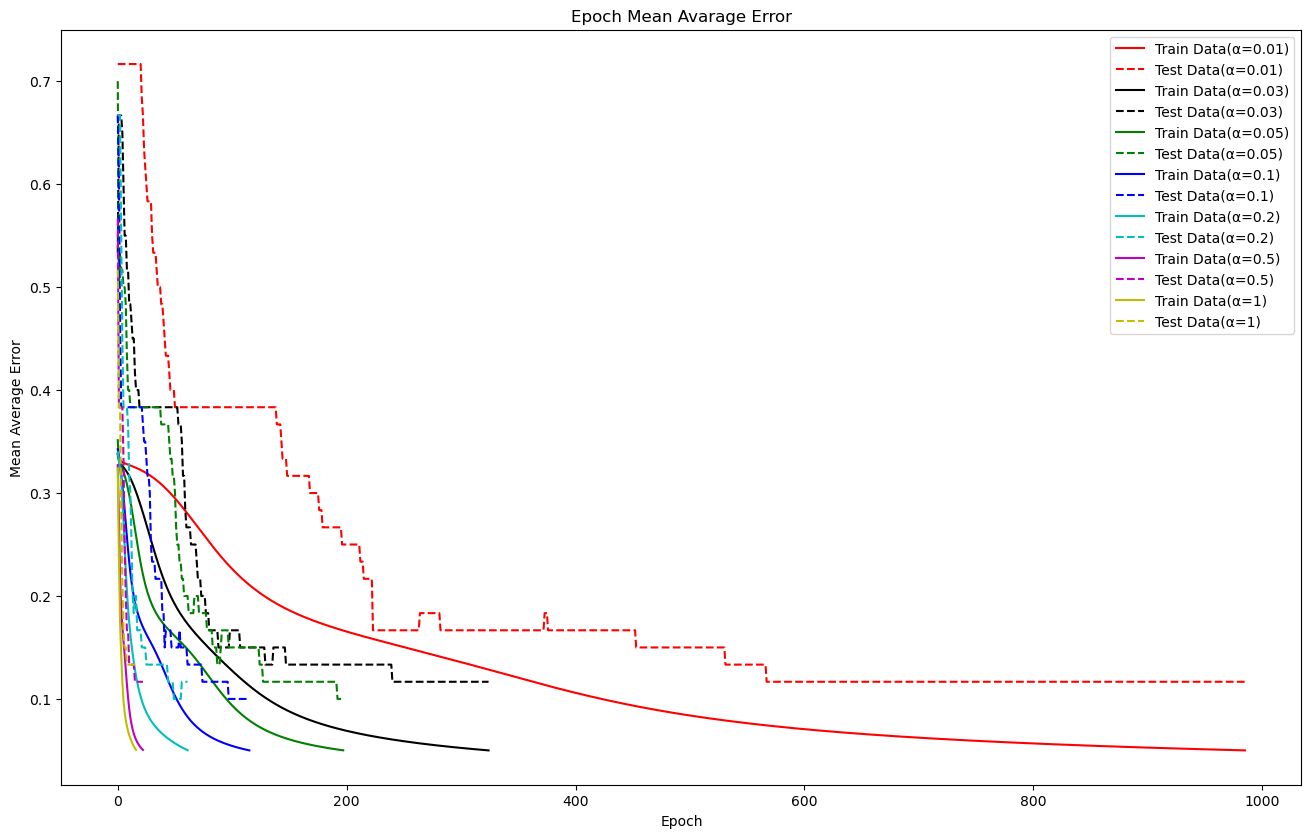

In [34]:
# Plot each learning rate
plt.figure(figsize=(16,10), dpi=100)

plt.plot(historic_epoch_Mean_error_001, color='r', label= "Train Data(α=0.01)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_001, color='r', label= "Test Data(α=0.01)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_003, color='k', label= "Train Data(α=0.03)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_003, color='k', label= "Test Data(α=0.03)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_005, color='g', label= "Train Data(α=0.05)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_005, color='g', label= "Test Data(α=0.05)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_010, color='b', label= "Train Data(α=0.1)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_010, color='b', label= "Test Data(α=0.1)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_020, color='c', label= "Train Data(α=0.2)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_020, color='c', label= "Test Data(α=0.2)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_050, color='m', label= "Train Data(α=0.5)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_050, color='m', label= "Test Data(α=0.5)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_100, color='y', label= "Train Data(α=1)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_100, color='y', label= "Test Data(α=1)", linestyle='dashed')

plt.legend()
#plt.ylim([0, 1])
plt.xlabel("Epoch")
plt.ylabel("Mean Average Error")
plt.title('Epoch Mean Avarage Error')
plt.show()

In [35]:
# Create a df with all the information
learning_rate_array=[0.01, 0.03, 0.05, 0.1, 0.2, 0.5, 1]
n_epoch_array=[n_epoch_001,n_epoch_003,n_epoch_005,n_epoch_010,n_epoch_020,n_epoch_050,n_epoch_100]
accuracy_array=[accuracy(confusion_matrix_001),accuracy(confusion_matrix_003),accuracy(confusion_matrix_005),accuracy(confusion_matrix_010),accuracy(confusion_matrix_020),accuracy(confusion_matrix_050),accuracy(confusion_matrix_100)]
mean_error_array=[calculate_Average_Error(historic_error_test_001),calculate_Average_Error(historic_error_test_003),calculate_Average_Error(historic_error_test_005),calculate_Average_Error(historic_error_test_010),calculate_Average_Error(historic_error_test_020),calculate_Average_Error(historic_error_test_050),calculate_Average_Error(historic_error_test_100)]

d = {'learning_rate': learning_rate_array, 'n_epoch': n_epoch_array, 'accuracy':accuracy_array, 'mean_error':mean_error_array}
df_plot_learning_rate = pd.DataFrame(data=d)
        

### Learning Rate vs Number of Epochs

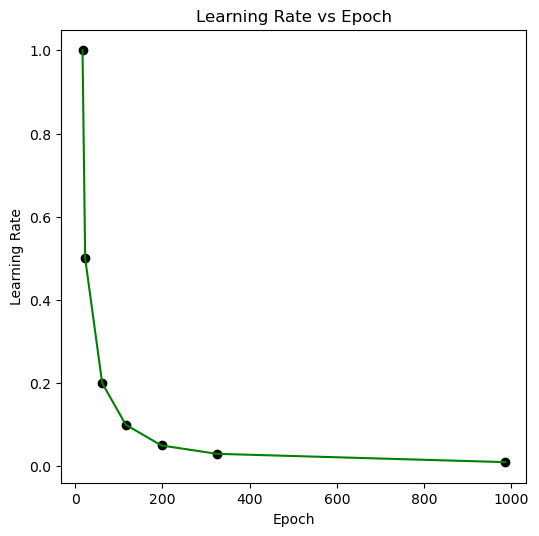

In [36]:
# Plot the Learning Rate vs the number of Epochs
plt.figure(figsize=(6,6), dpi=100)

plt.plot( df_plot_learning_rate['n_epoch'], df_plot_learning_rate['learning_rate'], c='g')
plt.scatter(df_plot_learning_rate['n_epoch'], df_plot_learning_rate['learning_rate'], c='k')

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title('Learning Rate vs Epoch')
plt.show()

### Learning Rate vs Number of Epochs vs Accuracy

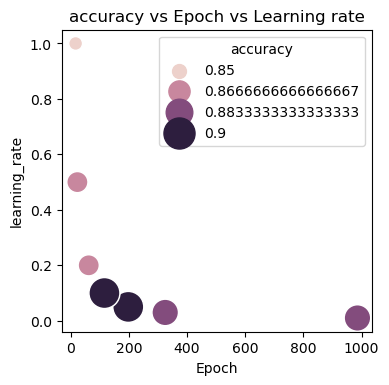

In [37]:
# Plot the Number of epochs vs the accuracy vs the Learning Rate
plt.figure(figsize=(4,4), dpi=100)

sns.scatterplot(data=df_plot_learning_rate,x="n_epoch", y="learning_rate",hue="accuracy",size="accuracy",sizes=(100, 500))

plt.xlabel("Epoch")
plt.ylabel("learning_rate")
plt.title('accuracy vs Epoch vs Learning rate')
plt.show()

In [38]:
df_plot_learning_rate

,learning_rate,n_epoch,accuracy,mean_error
0,0.01,986,0.883333,0.116667
1,0.03,325,0.883333,0.116667
2,0.05,198,0.900000,0.100000
3,0.10,116,0.900000,0.100000
4,0.20,62,0.866667,0.133333
5,0.50,23,0.866667,0.133333
6,1.00,17,0.850000,0.150000


# #######
# TEST 2
# #######

### Change Nº nodes in the hidden layer
Change the network architecture so there are **fewer nodes in the hidden layer**. What happens if you use three nodes? Five? Try a couple different values

For this to work, we need to change the function of the forward_Propagation, so that we can create more or less hiden nodes

We create a global variable that we can change later (named: hidden_layer_nodes), and we make the function use that global variable to get the number of nodes in the hidden layer

In [39]:
hidden_layer_nodes=7

#Problem 11, Forward Propagation
def forward_Propagation(f_input,t,w_input=None,w_hidden=None):
    global hidden_layer_nodes
    #If no Weights are given, we consider it to be the first iteration, so new weights are created
    if w_input==None:
        #print("Generating the input-hidden weights...")
        #print("...")
        w_input=initialize_Weights(8,hidden_layer_nodes)
        #print_mat("Input Weights:\n",w_input)
        #print("The weights have been generated")
    if w_hidden==None:
        #print("Generating the hidden-output weights...")
        #print("...")
        w_hidden=initialize_Weights((hidden_layer_nodes+1),3)
        #print_mat("Hidden Weights:\n",w_hidden)
        #print("The weights have been generated")
    #print_mat("Input Weights:\n",w_input)
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    ###############################
    ##### Forward Propagation #####
    ###############################
    
    #print("Doing Forward Propagation...")
    #print("...")
    #h_raw: Input vector multiply by input Weights
    h_raw=multiply_weights(f_input,w_input)
    #print_mat("h raw:",transpose_mat(h_raw))

    #h_activated: activated values for hidden layer
    h_activated=apply_sigmoid(transpose_mat(h_raw))
    #print_mat("h_activated:",h_activated)
    
    #o_raw: hidden vector multiply by hidden Weights
    o_raw=multiply_weights(h_activated,w_hidden)
    #print_mat("o raw:",transpose_mat(o_raw))

    #o_activated: activated values for output layer
    o_activated=apply_sigmoid(transpose_mat(o_raw))
    #print_mat("Predicted Output:",o_activated)
    
    #print_mat("True Output:",t)
    #print("Finished Forward Propagation")
    #print()
    return(o_activated,h_activated,w_input,w_hidden)#We return the Predicted Output, Output of the first layer and the weights

Now we are going to test the model with: 1, 2, 3, 4, 5, 6, 7 nodes

In [40]:
# Hidden Nodes=1
hidden_layer_nodes=1
alpha=0.1 # Learning Rate

end_1, w_input_1, w_hidden_1, n_epoch_1, iteration_1, historic_error_1, historic_epoch_Mean_error_1, historic_epoch_Mean_error_test_data_1 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
Epoch: 200
Iter: 30000
Epoch: 225
Iter: 35000
Epoch: 250
Iter: 40000
Epoch: 275
Epoch: 300
Iter: 45000
Epoch: 325
Iter: 50000
Epoch: 350
Iter: 55000
Epoch: 375
Epoch: 400
Iter: 60000
Epoch: 425
Iter: 65000
Epoch: 450
Iter: 70000
Epoch: 475
Epoch: 500
Iter: 75000
Epoch: 525
Iter: 80000
Epoch: 550
Iter: 85000
Epoch: 575
Epoch: 600
Iter: 90000
Epoch: 625
Iter: 95000
Epoch: 650
Iter: 100000
Epoch: 675
Epoch: 700
Iter: 105000
Epoch: 725
Iter: 110000
Epoch: 750
Iter: 115000
Epoch: 775
Epoch: 800
Iter: 120000
Epoch: 825
Iter: 125000
Epoch: 850
Iter: 130000
Epoch: 875
Epoch: 900
Iter: 135000
Epoch: 925
Iter: 140000
Epoch: 950
Iter: 145000
Epoch: 975
End of the program, Maximum Epoch reached. The Error threshold has not been achieved


In [41]:
# Hidden Nodes=2
hidden_layer_nodes=2

end_2, w_input_2, w_hidden_2, n_epoch_2, iteration_2, historic_error_2, historic_epoch_Mean_error_2, historic_epoch_Mean_error_test_data_2 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
Epoch: 200
Iter: 30000
Epoch: 225
Iter: 35000
Epoch: 250
Iter: 40000
Epoch: 275
Epoch: 300
Iter: 45000
Epoch: 325
Iter: 50000
Epoch: 350
Iter: 55000
Epoch: 375
Epoch: 400
Iter: 60000
Epoch: 425
Iter: 65000
Epoch: 450
Iter: 70000
Epoch: 475
Epoch: 500
Iter: 75000
Epoch: 525
Iter: 80000
Epoch: 550
Iter: 85000
Epoch: 575
Epoch: 600
Iter: 90000
Epoch: 625
Iter: 95000
Epoch: 650
Iter: 100000
Epoch: 675
Epoch: 700
Iter: 105000
Epoch: 725
Iter: 110000
Epoch: 750
Iter: 115000
Epoch: 775
Epoch: 800
Iter: 120000
Epoch: 825
Iter: 125000
Epoch: 850
Iter: 130000
Epoch: 875
Epoch: 900
Iter: 135000
Epoch: 925
Iter: 140000
Epoch: 950
Iter: 145000
Epoch: 975
End of the program, Maximum Epoch reached. The Error threshold has not been achieved


In [42]:
# Hidden Nodes=3
hidden_layer_nodes=3

end_3, w_input_3, w_hidden_3, n_epoch_3, iteration_3, historic_error_3, historic_epoch_Mean_error_3, historic_epoch_Mean_error_test_data_3 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
End of the program, the Error threshold has been achieved


In [43]:
# Hidden Nodes=4
hidden_layer_nodes=4

end_4, w_input_4, w_hidden_4, n_epoch_4, iteration_4, historic_error_4, historic_epoch_Mean_error_4, historic_epoch_Mean_error_test_data_4 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
End of the program, the Error threshold has been achieved


In [44]:
# Hidden Nodes=5
hidden_layer_nodes=5

end_5, w_input_5, w_hidden_5, n_epoch_5, iteration_5, historic_error_5, historic_epoch_Mean_error_5, historic_epoch_Mean_error_test_data_5 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
End of the program, the Error threshold has been achieved


In [45]:
# Hidden Nodes=6
hidden_layer_nodes=6

end_6, w_input_6, w_hidden_6, n_epoch_6, iteration_6, historic_error_6, historic_epoch_Mean_error_6, historic_epoch_Mean_error_test_data_6 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
End of the program, the Error threshold has been achieved


In [46]:
# Hidden Nodes=7
hidden_layer_nodes=7

end_7, w_input_7, w_hidden_7, n_epoch_7, iteration_7, historic_error_7, historic_epoch_Mean_error_7, historic_epoch_Mean_error_test_data_7 = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
End of the program, the Error threshold has been achieved


In [47]:
# Test Data
# We now run the test data on each hidden nodes configuration
# Hidden Nodes=1
historic_predicted_value_test_1, historic_error_test_1, confusion_matrix_1=main_test_program(df_x_test,df_y_test,w_input_1,w_hidden_1)
# Hidden Nodes=2
historic_predicted_value_test_2, historic_error_test_2, confusion_matrix_2=main_test_program(df_x_test,df_y_test,w_input_2,w_hidden_2)
# Hidden Nodes=3
historic_predicted_value_test_3, historic_error_test_3, confusion_matrix_3=main_test_program(df_x_test,df_y_test,w_input_3,w_hidden_3)
# Hidden Nodes=4
historic_predicted_value_test_4, historic_error_test_4, confusion_matrix_4=main_test_program(df_x_test,df_y_test,w_input_4,w_hidden_4)
# Hidden Nodes=5
historic_predicted_value_test_5, historic_error_test_5, confusion_matrix_5=main_test_program(df_x_test,df_y_test,w_input_5,w_hidden_5)
# Hidden Nodes=6
historic_predicted_value_test_6, historic_error_test_6, confusion_matrix_6=main_test_program(df_x_test,df_y_test,w_input_6,w_hidden_6)
# Hidden Nodes=7
historic_predicted_value_test_7, historic_error_test_7, confusion_matrix_7=main_test_program(df_x_test,df_y_test,w_input_6,w_hidden_6)

# Now lets compare them

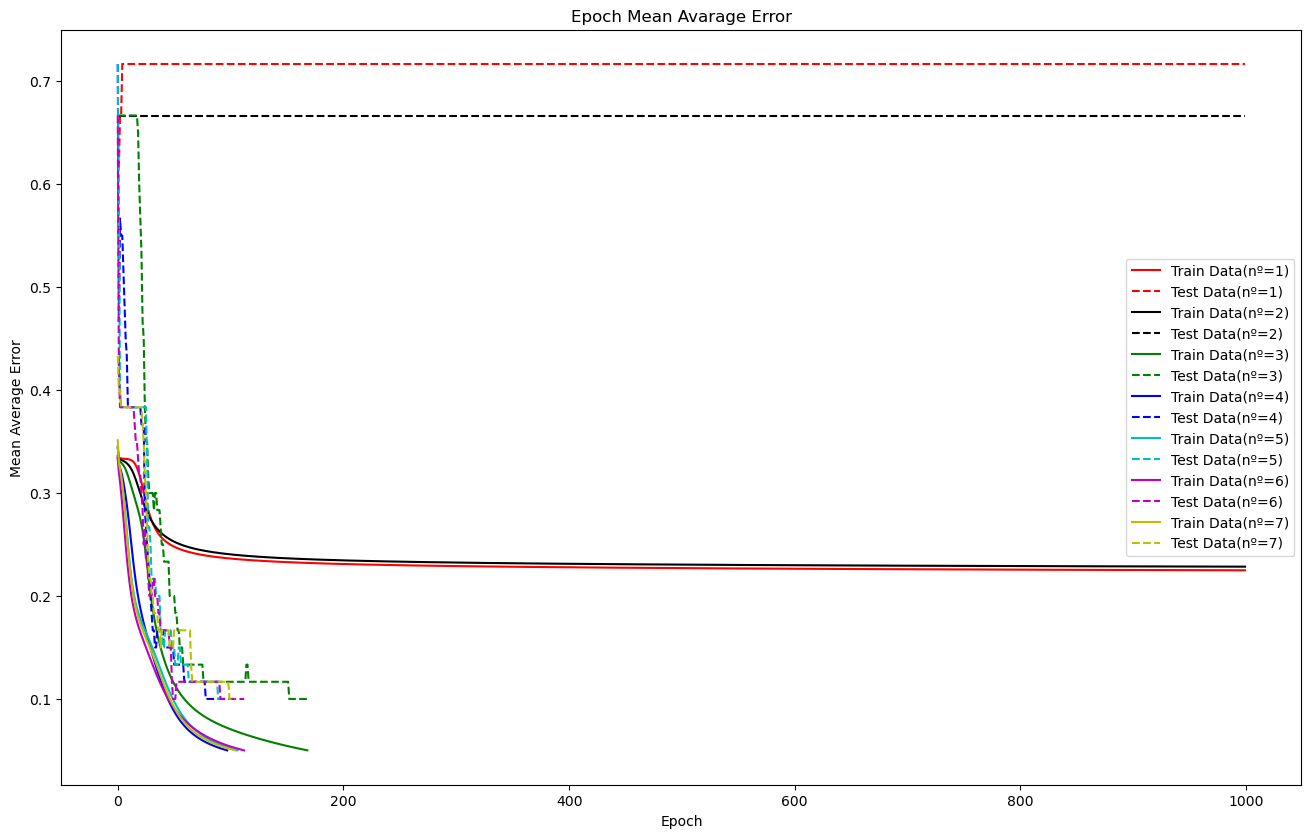

In [48]:
# Plot each learning rate
plt.figure(figsize=(16,10), dpi=100)

plt.plot(historic_epoch_Mean_error_1, color='r', label= "Train Data(nº=1)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_1, color='r', label= "Test Data(nº=1)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_2, color='k', label= "Train Data(nº=2)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_2, color='k', label= "Test Data(nº=2)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_3, color='g', label= "Train Data(nº=3)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_3, color='g', label= "Test Data(nº=3)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_4, color='b', label= "Train Data(nº=4)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_4, color='b', label= "Test Data(nº=4)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_5, color='c', label= "Train Data(nº=5)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_5, color='c', label= "Test Data(nº=5)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_6, color='m', label= "Train Data(nº=6)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_6, color='m', label= "Test Data(nº=6)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_7, color='y', label= "Train Data(nº=7)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_7, color='y', label= "Test Data(nº=7)", linestyle='dashed')

plt.legend()
#plt.ylim([0, 1])
plt.xlabel("Epoch")
plt.ylabel("Mean Average Error")
plt.title('Epoch Mean Avarage Error')
plt.show()

In [49]:
# Create a df with all the information
n_nodes_array=[1, 2, 3, 4, 5, 6, 7]
n_epoch_array=[n_epoch_1,n_epoch_2,n_epoch_3,n_epoch_4,n_epoch_5,n_epoch_6,n_epoch_7]
accuracy_array=[accuracy(confusion_matrix_1),accuracy(confusion_matrix_2),accuracy(confusion_matrix_3),accuracy(confusion_matrix_4),accuracy(confusion_matrix_5),accuracy(confusion_matrix_6),accuracy(confusion_matrix_7)]
mean_error_array=[calculate_Average_Error(historic_error_test_1),calculate_Average_Error(historic_error_test_2),calculate_Average_Error(historic_error_test_3),calculate_Average_Error(historic_error_test_4),calculate_Average_Error(historic_error_test_5),calculate_Average_Error(historic_error_test_6),calculate_Average_Error(historic_error_test_7)]

d = {'n_nodes': n_nodes_array, 'n_epoch': n_epoch_array, 'accuracy':accuracy_array, 'mean_error':mean_error_array}
df_plot_n_nodes = pd.DataFrame(data=d)
        

### Learning Rate vs Number of Epochs

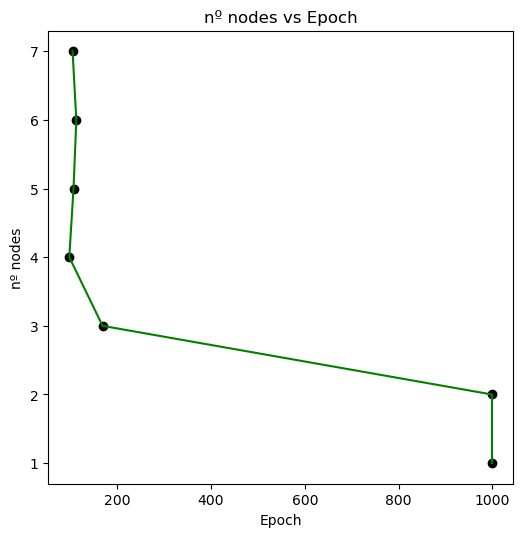

In [50]:
# Plot the Learning Rate vs the number of Epochs
plt.figure(figsize=(6,6), dpi=100)

plt.plot( df_plot_n_nodes['n_epoch'], df_plot_n_nodes['n_nodes'], c='g')
plt.scatter(df_plot_n_nodes['n_epoch'], df_plot_n_nodes['n_nodes'], c='k')

plt.xlabel("Epoch")
plt.ylabel("nº nodes")
plt.title('nº nodes vs Epoch')
plt.show()

### Nº nodes vs Number of Epochs vs Accuracy

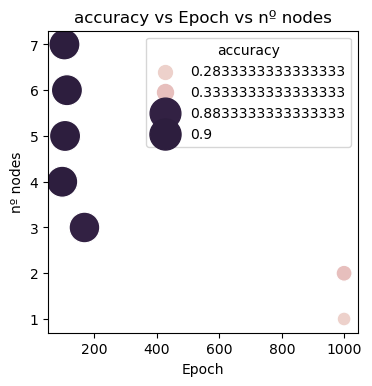

In [51]:
# Plot the Number of epochs vs the accuracy vs the Learning Rate
plt.figure(figsize=(4,4), dpi=100)

sns.scatterplot(data=df_plot_n_nodes,x="n_epoch", y="n_nodes",hue="accuracy",size="accuracy",sizes=(100, 500))

plt.xlabel("Epoch")
plt.ylabel("nº nodes")
plt.title('accuracy vs Epoch vs nº nodes')
plt.show()

In [52]:
df_plot_n_nodes

,n_nodes,n_epoch,accuracy,mean_error
0,1,999,0.283333,0.716667
1,2,999,0.333333,0.666667
2,3,169,0.883333,0.116667
3,4,98,0.900000,0.100000
4,5,107,0.900000,0.100000
5,6,113,0.900000,0.100000
6,7,105,0.900000,0.100000


# #######
# TEST 3
# #######

### Change Activation Function
Change the **activation function**. You might try the hyperbolic tangent function or the RELU function here. I can assist with the gradient formulas for these.


I tried the Relu and tanh activation Functions

First we need to create those functions:

In [53]:
#Problem 3, apply relu function
def apply_relu(h_raw):
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = relu(ℎ𝑟𝑎𝑤)
    # ℎ𝑟𝑎𝑤: dimensions[(a) x (b)]
    # relu(ℎ𝑟𝑎𝑤): dimensions[(a) x (b)]
    
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = relu(ℎ𝑟𝑎𝑤)
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑: dimensions[(a) x (b)]
    
    h_activated=[[0 for x in range(len(h_raw[0]))] for y in range(len(h_raw))]#Create the response matrix
    for x, row in enumerate(h_raw):
        for y, item in enumerate(row):
            h_activated[x][y]=relu(item)
    return h_activated
            
def relu(item):
    if item > 0:
        return item
    else:
        return 0

In [54]:
#Problem 3, apply tanh function
def apply_tanh(h_raw):
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = tanh(ℎ𝑟𝑎𝑤)
    # ℎ𝑟𝑎𝑤: dimensions[(a) x (b)]
    # tanh(ℎ𝑟𝑎𝑤): dimensions[(a) x (b)]
    
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = tanh(ℎ𝑟𝑎𝑤)
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑: dimensions[(a) x (b)]
    
    h_activated=[[0 for x in range(len(h_raw[0]))] for y in range(len(h_raw))]#Create the response matrix
    for x, row in enumerate(h_raw):
        for y, item in enumerate(row):
            h_activated[x][y]=tanh(item)
    return h_activated
            
def tanh(item):
    return np.tanh(item)

We also need to change the back propagation

First for Relu

In [55]:
#Problem 5, calculate the 𝑔(𝐸, 𝑊𝑗𝑘)
def g_E_Wjk_fun_relu(o_activated,t,h_activated):
    # 𝑔(𝐸,𝑊𝑗𝑘) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇ℎ𝑖𝑑𝑗 if 𝑇𝑜𝑢𝑡𝑘 > 0
    #
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)] * h_activated T} T     (**: Indicates multiply elem by elem)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # h_activated: dimensions[(b) x 1]    [7 x 1]
    
    # (o_activated-t): dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t = subtraction(o_activated,t)
    #print_mat("o_activated_t:",o_activated_minus_t)
    
    # if o_activated <= 0 then o_activated_minus_t==0, so that the multiplication is 0
    for x, row in enumerate(o_activated_minus_t):
        for y, item in enumerate(row):
            if o_activated[x][y]<=0:
                o_activated_minus_t[x][y]=0
    
    # h_activated T: dimensions[1 x (b)]    [1 x 7]
    trans_h_activated=transpose_mat(h_activated)
    #print_mat("trans_h_activated:",trans_h_activated)
    
    # (o_activated-t)*h_activated T: dimensions[(a) x (b)]    [3 x 7]
    res=muliply_mat(o_activated_minus_t,trans_h_activated)
    #print_mat("𝑔(𝐸,𝑊𝑗𝑘):",res)
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = 0 if 𝑇𝑜𝑢𝑡𝑘 <=0
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇ℎ𝑖𝑑𝑗 if 𝑇𝑜𝑢𝑡𝑘 > 0
    # 𝑔(𝐸,𝑊𝑗𝑘) = { (o_activated-t) * h_activated T} T if 𝑇𝑜𝑢𝑡𝑘 > 0
    # 𝑔(𝐸,𝑊𝑗𝑘): dimensions[(b) x (a)] [7 x 3]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights

In [56]:
#Problem 6, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂)
def g_E_biasO_fun_relu(o_activated,t):
    # 𝑔(𝐸,𝑊𝑗𝑘) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑊𝑗𝑘) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)] if 𝑇𝑜𝑢𝑡𝑘 > 0
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)] (Multiply by a row of ones in order to add)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # ones: dimensions[1 x (a)]           [1 x 3]   (Form by 1's) (1 ... 1)
    
    # (o_activated-t): dimensions[(a) x 1] [3 x 1] (Same as Problem 5)
    o_activated_minus_t = subtraction(o_activated,t)
    
    # if o_activated <= 0 then o_activated_minus_t==0, so that the multiplication is 0
    for x, row in enumerate(o_activated_minus_t):
        for y, item in enumerate(row):
            if o_activated[x][y]<=0:
                o_activated_minus_t[x][y]=0
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 3]
    ones=[[1 for x in range(len(o_activated_minus_t))]]
    #print_mat("ones:",ones)
    
    # ones * (o_activated-t) : dimensions[1 x 1]
    res=muliply_mat(ones,o_activated_minus_t)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂):",res)
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑊𝑗𝑘) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)] if 𝑇𝑜𝑢𝑡𝑘 > 0
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)] if 𝑇𝑜𝑢𝑡𝑘 > 0 
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂): dimensions[1 x 1]
    return res

In [57]:
#Problem 7, calculate the 𝑔(𝐸,𝑤𝑖𝑗)
def g_E_wij_fun_relu(o_activated,t,w_hidden,h_activated,f_input):
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇ℎ𝑖𝑑𝑗 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘]∙𝑖𝑛𝑝𝑖 if 𝑇𝑜𝑢𝑡𝑘,𝑇ℎ𝑖𝑑𝑗 > 0
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # 𝑖𝑛𝑝𝑖 = f_input
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*f_input
    # 𝑔(𝐸,𝑤𝑖𝑗) = { 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) * f_input T } T
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # f_input: dimensions[(b) x 1]    [7 x 1]
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    g_E_Thidj = g_E_Thidj_fun_relu(o_activated,t,w_hidden)
    #print_mat("𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗):",g_E_Thidj)
    
    # if h_activated <= 0 then g_E_Thidj==0, so that the multiplication is 0
    for x, row in enumerate(g_E_Thidj):
        for y, item in enumerate(row):
            if h_activated[x][y]<=0:
                g_E_Thidj[x][y]=0
    
    # f_input T: dimensions[1 x (b)] [1 x 7]
    trans_f_input=transpose_mat(f_input)
    #print_mat("trans_f_input:",trans_f_input)
    
    #  𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) * f_input T: dimensions[(a) x (b)] [7 x 7]
    res=muliply_mat(g_E_Thidj, trans_f_input)
    #print_mat("𝑔(𝐸,𝑤𝑖𝑗):",res)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇ℎ𝑖𝑑𝑗 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘]∙𝑖𝑛𝑝𝑖 if 𝑇𝑜𝑢𝑡𝑘,𝑇ℎ𝑖𝑑𝑗 > 0
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = { 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) * f_input T} T
    # 𝑔(𝐸,𝑤𝑖𝑗): dimensions[(b) x (a)] [7 x 7]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights

#Calculate 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
def g_E_Thidj_fun_relu(o_activated,t,w_hidden):
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑊𝑗𝑘 if if 𝑇𝑜𝑢𝑡𝑘 > 0
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)*w_hidden]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)]
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # w_hidden [(b) x (a)]                [8 x 3] (We need to ignore the last row, belongs to the bias)
    
    # [(o_activated-t)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5 & 6)
    o_activated_minus_t = subtraction(o_activated,t)
    
    # if o_activated <= 0 then o_activated_minus_t==0, so that the multiplication is 0
    for x, row in enumerate(o_activated_minus_t):
        for y, item in enumerate(row):
            if o_activated[x][y]<=0:
                o_activated_minus_t[x][y]=0
    
    # w_hidden * [(o_activated-t)]: dimensions[(b-1) x 1] [7 x 1]
    w_hid_x_o_act_minus_t = muliply_mat(w_hidden[:-1],o_activated_minus_t)
    #print_mat("w_hid_x_o_act_minus_t:",w_hid_x_o_act_minus_t)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑊𝑗𝑘
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions [7 x 1]
    return w_hid_x_o_act_minus_t

In [58]:
#Problem 8, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻)
def g_E_biasH_fun_relu(o_activated,t,w_hidden,h_activated):
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇ℎ𝑖𝑑𝑗 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘]] if 𝑇𝑜𝑢𝑡𝑘,𝑇ℎ𝑖𝑑𝑗 > 0
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # ones: dimensions[1 x (a)]           [1 x 7]   (Form by 1's) (1 ... 1)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj = g_E_Thidj_fun_relu(o_activated,t,w_hidden)
    
    # if h_activated <= 0 then g_E_Thidj==0, so that the multiplication is 0
    for x, row in enumerate(g_E_Thidj):
        for y, item in enumerate(row):
            if h_activated[x][y]<=0:
                g_E_Thidj[x][y]=0
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 7]
    ones=[[1 for x in range(len(g_E_Thidj))]]
    #print_mat("ones:",ones)
    
    # ones * [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)] : dimensions[1 x 1]
    res=muliply_mat(ones,g_E_Thidj)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻):",res)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇𝑜𝑢𝑡𝑘 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = 0 if 𝑇ℎ𝑖𝑑𝑗 <= 0
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑊𝑗𝑘]] if 𝑇𝑜𝑢𝑡𝑘,𝑇ℎ𝑖𝑑𝑗 > 0
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻): dimensions[1 x 1]
    return res

Now for tanh

In [59]:
#Problem 5, calculate the 𝑔(𝐸, 𝑊𝑗𝑘)
def g_E_Wjk_fun_tanh(o_activated,t,h_activated):
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑇ℎ𝑖𝑑𝑗
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**derivative_tanh(o_activated) ] * h_activated T} T     (**: Indicates multiply elem by elem)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # h_activated: dimensions[(b) x 1]    [7 x 1]
    
    # (o_activated-t): dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t = subtraction(o_activated,t)
    #print_mat("o_activated_t:",o_activated_minus_t)
    
    # derivative_tanh(o_activated): dimensions[(a) x 1] [3 x 1]
    der_o_activated=derivative_tanh(o_activated)
    #print_mat("der_o_activated:",der_o_activated)
    
    # (o_activated-t)**derivative_tanh(o_activated): dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t_xx_der_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,der_o_activated)
    #print_mat("o_activated_minus_t_xx_der_o_activated:",o_activated_minus_t_xx_der_o_activated)
    
    # h_activated T: dimensions[1 x (b)]    [1 x 7]
    trans_h_activated=transpose_mat(h_activated)
    #print_mat("trans_h_activated:",trans_h_activated)
    
    # [(o_activated-t)**derivative_tanh(o_activated)]*h_activated T: dimensions[(a) x (b)]    [3 x 7]
    res=muliply_mat(o_activated_minus_t_xx_der_o_activated,trans_h_activated)
    #print_mat("𝑔(𝐸,𝑊𝑗𝑘):",res)
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑇ℎ𝑖𝑑𝑗
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**derivative_tanh(o_activated) ] * h_activated T} T
    # 𝑔(𝐸,𝑊𝑗𝑘): dimensions[(b) x (a)] [7 x 3]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights
    
    
def derivative_tanh(vec):
    # 1 / ( cosh2 ( arctanh ( value ) ) )
    res=[[0 for x in range(len(vec[0]))] for y in range(len(vec))]#Create the response matrix
    for x, row in enumerate(vec):
        for y, item in enumerate(row):
            n1 = np.arctanh(item) # np.arctanh(-0.9999999999999999)
            n2 = np.cosh(n1)
            n3 = n2*n2
            res[x][y] = 1/n3
    return res

In [60]:
#Problem 6, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂)
def g_E_biasO_fun_tanh(o_activated,t):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)*derivative_tanh(o_activated) ]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)**derivative_tanh(o_activated)]      (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**derivative_tanh(o_activated)] (Multiply by a row of ones in order to add)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # ones: dimensions[1 x (a)]           [1 x 3]   (Form by 1's) (1 ... 1)
    
    # [(o_activated-t)**derivative_tanh(o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5)
    o_activated_minus_t = subtraction(o_activated,t)
    der_o_activated=derivative_tanh(o_activated)
    o_activated_minus_t_xx_der_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,der_o_activated)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 3]
    ones=[[1 for x in range(len(o_activated_minus_t_xx_der_o_activated))]]
    #print_mat("ones:",ones)
    
    # ones * [(o_activated-t)**derivative_tanh(o_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,o_activated_minus_t_xx_der_o_activated)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**derivative_tanh(o_activated)] 
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂): dimensions[1 x 1]
    return res

In [61]:
#Problem 7, calculate the 𝑔(𝐸,𝑤𝑖𝑗)
def g_E_wij_fun_tanh(o_activated,t,w_hidden,h_activated,f_input):
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘]∙[1/(cosh2(tanh-1(𝑇ℎ𝑖𝑑𝑗)))]∙𝑖𝑛𝑝𝑖
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # 𝑖𝑛𝑝𝑖 = f_input
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*derivative_tanh(h_activated)*f_input
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # f_input: dimensions[(b) x 1]    [7 x 1]
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    g_E_Thidj = g_E_Thidj_fun_tanh(o_activated,t,w_hidden)
    #print_mat("𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗):",g_E_Thidj)
    
    # derivative_tanh(h_activated): dimensions[(a) x 1] [3 x 1]
    der_h_activated=derivative_tanh(h_activated)
    #print_mat("der_o_activated:",der_o_activated)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(o_activated): dimensions[(a) x 1] [7 x 1]
    g_E_Thidj_xx_der_h_activated = muliply_mat_elem_by_elem(g_E_Thidj,der_h_activated)
    #print_mat("g_E_Thidj_xx_der_h_activated:",g_E_Thidj_xx_der_h_activated)
    
    # f_input T: dimensions[1 x (b)] [1 x 7]
    trans_f_input=transpose_mat(f_input)
    #print_mat("trans_f_input:",trans_f_input)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(h_activated)]*f_input T: dimensions[(a) x (b)] [7 x 7]
    res=muliply_mat(g_E_Thidj_xx_der_h_activated,trans_f_input)
    #print_mat("𝑔(𝐸,𝑤𝑖𝑗):",res)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘]∙[1/(cosh2(tanh-1(𝑇ℎ𝑖𝑑𝑗)))]∙𝑖𝑛𝑝𝑖
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑤𝑖𝑗): dimensions[(b) x (a)] [7 x 7]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights

#Calculate 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
def g_E_Thidj_fun_tanh(o_activated,t,w_hidden):
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∗𝑊𝑗𝑘
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)*derivative_tanh(o_activated)*w_hidden]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)**derivative_tanh(o_activated)*w_hidden] (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**derivative_tanh(o_activated)]
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # w_hidden [(b) x (a)]                [8 x 3] (We need to ignore the last row, belongs to the bias)
    
    # [(o_activated-t)**derivative_tanh(o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5 & 6)
    o_activated_minus_t = subtraction(o_activated,t)
    der_o_activated=derivative_tanh(o_activated)
    o_activated_minus_t_xx_der_o_activated = muliply_mat_elem_by_elem(o_activated_minus_t,der_o_activated)
    #print_mat("o_activated_minus_t_xx_der_o_activated:",o_activated_minus_t_xx_der_o_activated)
    
    # w_hidden * [(o_activated-t)**derivative_tanh(o_activated)]: dimensions[(b-1) x 1] [7 x 1]
    w_hid_x_o_act_m_t_xx_der_o_act = muliply_mat(w_hidden[:-1],o_activated_minus_t_xx_der_o_activated)
    #print_mat("w_hid_x_o_act_m_t_xx_der_o_act:",w_hid_x_o_act_m_t_xx_der_o_act)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∗𝑊𝑗𝑘
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**derivative_tanh(o_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions [7 x 1]
    return w_hid_x_o_act_m_t_xx_der_o_act

In [62]:
#Problem 8, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻)
def g_E_biasH_fun_tanh(o_activated,t,w_hidden,h_activated):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘]∙[1/(cosh2(tanh-1(𝑇ℎ𝑖𝑑𝑗)))]]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*derivative_tanh(h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** derivative_tanh(h_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # ones: dimensions[1 x (a)]           [1 x 7]   (Form by 1's) (1 ... 1)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(h_activated)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj                             = g_E_Thidj_fun_tanh(o_activated,t,w_hidden)
    der_h_activated                       = derivative_tanh(h_activated)
    g_E_Thidj_xx_der_h_activated          = muliply_mat_elem_by_elem(g_E_Thidj,der_h_activated)
    #print_mat("g_E_Thidj_xx_der_h_activated:",g_E_Thidj_xx_der_h_activated)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 7]
    ones=[[1 for x in range(len(g_E_Thidj_xx_der_h_activated))]]
    #print_mat("ones:",ones)
    
    # ones * [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**derivative_tanh(h_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,g_E_Thidj_xx_der_h_activated)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙[1/(cosh2(tanh-1(𝑇𝑜𝑢𝑡𝑘)))]∙𝑊𝑗𝑘]∙[1/(cosh2(tanh-1(𝑇ℎ𝑖𝑑𝑗)))]]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** derivative_tanh(h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻): dimensions[1 x 1]
    return res

# Change the forward propagation and Update weights functions to call the *RELU* functions instead of the sigmoid

In [63]:
#Problem 9, update the weights for the Input-to-hidden layer
def update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input):
    #Get gradient
    g_E_wij   = g_E_wij_fun_relu(o_activated,t,w_hidden,h_activated,f_input)
    g_E_biasH = g_E_biasH_fun_relu(o_activated,t,w_hidden,h_activated)
    
    for x in range(len(w_input)):
        for y in range(len(w_input[0])):
            if(x==(len(w_input)-1)):#Bias
                w_input[x][y]=w_input[x][y] - (alpha * g_E_biasH[0][0])
            else:#Normal Weights
                w_input[x][y]=w_input[x][y] - (alpha * g_E_wij[x][y])

In [64]:
#Problem 10, update the weights for the Hidden-to-output layer
def update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated):
    #Get gradient
    g_E_Wjk   = g_E_Wjk_fun_relu(o_activated,t,h_activated)
    g_E_biasO = g_E_biasO_fun_relu(o_activated,t)
    
    for x in range(len(w_hidden)):
        for y in range(len(w_hidden[0])):
            if(x==(len(w_hidden)-1)):#Bias
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_biasO[0][0])
            else:#Normal Weights
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_Wjk[x][y])

In [65]:
#Problem 11, Forward Propagation
def forward_Propagation(f_input,t,w_input=None,w_hidden=None):
    #If no Weights are given, we consider it to be the first iteration, so new weights are created
    if w_input==None:
        #print("Generating the input-hidden weights...")
        #print("...")
        w_input=initialize_Weights(8,7)
        #print_mat("Input Weights:\n",w_input)
        #print("The weights have been generated")
    if w_hidden==None:
        #print("Generating the hidden-output weights...")
        #print("...")
        w_hidden=initialize_Weights(8,3)
        #print_mat("Hidden Weights:\n",w_hidden)
        #print("The weights have been generated")
    #print_mat("Input Weights:\n",w_input)
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    ###############################
    ##### Forward Propagation #####
    ###############################
    
    #print("Doing Forward Propagation...")
    #print("...")
    #h_raw: Input vector multiply by input Weights
    h_raw=multiply_weights(f_input,w_input)
    #print_mat("h raw:",transpose_mat(h_raw))

    #h_activated: activated values for hidden layer
    h_activated=apply_relu(transpose_mat(h_raw))
    #print_mat("h_activated:",h_activated)
    
    #o_raw: hidden vector multiply by hidden Weights
    o_raw=multiply_weights(h_activated,w_hidden)
    #print_mat("o raw:",transpose_mat(o_raw))

    #o_activated: activated values for output layer
    o_activated=apply_relu(transpose_mat(o_raw))
    #print_mat("Predicted Output:",o_activated)
    
    #print_mat("True Output:",t)
    #print("Finished Forward Propagation")
    #print()
    return(o_activated,h_activated,w_input,w_hidden)#We return the Predicted Output, Output of the first layer and the weights

### RELU
The code have been change to apply the Relu Function.
Now we run it and save the results

In [66]:
alpha=0.1 # Learning Rate
epoch=1000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end_relu, w_input_relu, w_hidden_relu, n_epoch_relu, iteration_relu, historic_error_relu, historic_epoch_Mean_error_relu, historic_epoch_Mean_error_test_data_relu = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
Epoch: 200
Iter: 30000
Epoch: 225
Iter: 35000
Epoch: 250
Iter: 40000
Epoch: 275
Epoch: 300
Iter: 45000
Epoch: 325
Iter: 50000
Epoch: 350
Iter: 55000
Epoch: 375
Epoch: 400
Iter: 60000
Epoch: 425
Iter: 65000
Epoch: 450
Iter: 70000
Epoch: 475
Epoch: 500
Iter: 75000
Epoch: 525
Iter: 80000
Epoch: 550
Iter: 85000
Epoch: 575
Epoch: 600
Iter: 90000
Epoch: 625
Iter: 95000
Epoch: 650
Iter: 100000
Epoch: 675
Epoch: 700
Iter: 105000
Epoch: 725
Iter: 110000
Epoch: 750
Iter: 115000
Epoch: 775
Epoch: 800
Iter: 120000
Epoch: 825
Iter: 125000
Epoch: 850
Iter: 130000
Epoch: 875
Epoch: 900
Iter: 135000
Epoch: 925
Iter: 140000
Epoch: 950
Iter: 145000
Epoch: 975
End of the program, Maximum Epoch reached. The Error threshold has not been achieved


In [67]:
# Test Data
# We now run the test data on the relu model
# Hidden Nodes=1
historic_predicted_value_test_relu, historic_error_test_relu, confusion_matrix_relu=main_test_program(df_x_test,df_y_test,w_input_relu,w_hidden_relu)


# Change the forward propagation and Update weights functions to call the *TANH* functions instead of the sigmoid

In [68]:
#Problem 9, update the weights for the Input-to-hidden layer
def update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input):
    #Get gradient
    g_E_wij   = g_E_wij_fun_tanh(o_activated,t,w_hidden,h_activated,f_input)
    g_E_biasH = g_E_biasH_fun_tanh(o_activated,t,w_hidden,h_activated)
    
    for x in range(len(w_input)):
        for y in range(len(w_input[0])):
            if(x==(len(w_input)-1)):#Bias
                w_input[x][y]=w_input[x][y] - (alpha * g_E_biasH[0][0])
            else:#Normal Weights
                w_input[x][y]=w_input[x][y] - (alpha * g_E_wij[x][y])

In [69]:
#Problem 10, update the weights for the Hidden-to-output layer
def update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated):
    #Get gradient
    g_E_Wjk   = g_E_Wjk_fun_tanh(o_activated,t,h_activated)
    g_E_biasO = g_E_biasO_fun_tanh(o_activated,t)
    
    for x in range(len(w_hidden)):
        for y in range(len(w_hidden[0])):
            if(x==(len(w_hidden)-1)):#Bias
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_biasO[0][0])
            else:#Normal Weights
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_Wjk[x][y])

In [70]:
#Problem 11, Forward Propagation
def forward_Propagation(f_input,t,w_input=None,w_hidden=None):
    #If no Weights are given, we consider it to be the first iteration, so new weights are created
    if w_input==None:
        #print("Generating the input-hidden weights...")
        #print("...")
        w_input=initialize_Weights(8,7)
        #print_mat("Input Weights:\n",w_input)
        #print("The weights have been generated")
    if w_hidden==None:
        #print("Generating the hidden-output weights...")
        #print("...")
        w_hidden=initialize_Weights(8,3)
        #print_mat("Hidden Weights:\n",w_hidden)
        #print("The weights have been generated")
    #print_mat("Input Weights:\n",w_input)
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    ###############################
    ##### Forward Propagation #####
    ###############################
    
    #print("Doing Forward Propagation...")
    #print("...")
    #h_raw: Input vector multiply by input Weights
    h_raw=multiply_weights(f_input,w_input)
    #print_mat("h raw:",transpose_mat(h_raw))

    #h_activated: activated values for hidden layer
    h_activated=apply_tanh(transpose_mat(h_raw))
    #print_mat("h_activated:",h_activated)
    
    #o_raw: hidden vector multiply by hidden Weights
    o_raw=multiply_weights(h_activated,w_hidden)
    #print_mat("o raw:",transpose_mat(o_raw))

    #o_activated: activated values for output layer
    o_activated=apply_tanh(transpose_mat(o_raw))
    #print_mat("Predicted Output:",o_activated)
    
    #print_mat("True Output:",t)
    #print("Finished Forward Propagation")
    #print()
    return(o_activated,h_activated,w_input,w_hidden)#We return the Predicted Output, Output of the first layer and the weights

### TanH
The code have been change to apply the tanh Function.
Now we run it and save the results

In [71]:
alpha=0.1 # Learning Rate
epoch=1000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end_tanh, w_input_tanh, w_hidden_tanh, n_epoch_tanh, iteration_tanh, historic_error_tanh, historic_epoch_Mean_error_tanh, historic_epoch_Mean_error_test_data_tanh = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
End of the program, the Error threshold has been achieved


In [72]:
# Test Data
# We now run the test data on the relu model
# Hidden Nodes=1
historic_predicted_value_test_tanh, historic_error_test_tanh, confusion_matrix_tanh=main_test_program(df_x_test,df_y_test,w_input_tanh,w_hidden_tanh)


# Now lets compare them

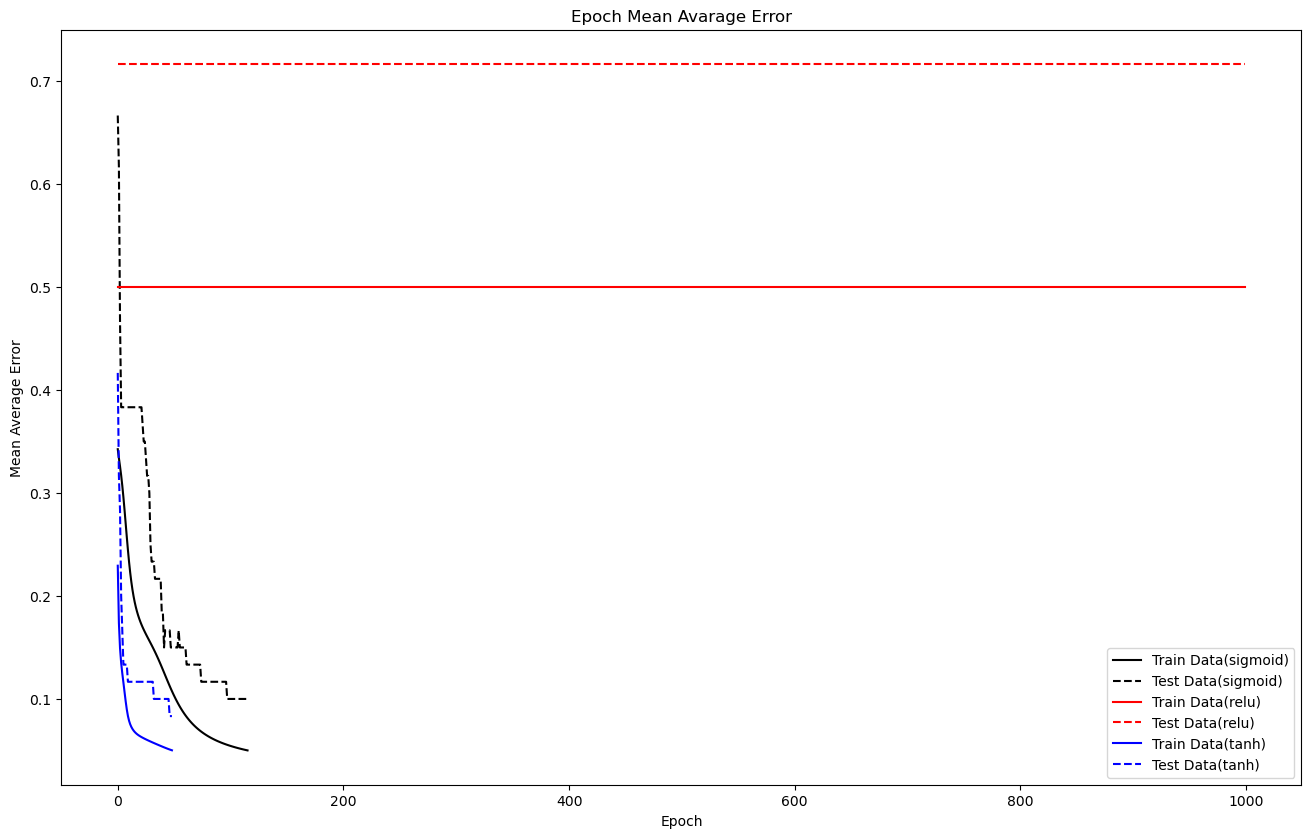

In [73]:
# Plot each learning rate
plt.figure(figsize=(16,10), dpi=100)

plt.plot(historic_epoch_Mean_error_010, color='k', label= "Train Data(sigmoid)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_010, color='k', label= "Test Data(sigmoid)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_relu, color='r', label= "Train Data(relu)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_relu, color='r', label= "Test Data(relu)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_tanh, color='b', label= "Train Data(tanh)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_tanh, color='b', label= "Test Data(tanh)", linestyle='dashed')

plt.legend()
#plt.ylim([0, 1])
plt.xlabel("Epoch")
plt.ylabel("Mean Average Error")
plt.title('Epoch Mean Avarage Error')
plt.show()

In [74]:
# Create a df with all the information
activation_array=['Sigmoid', 'Relu', 'TanH']
n_epoch_array=[n_epoch_010,n_epoch_relu,n_epoch_tanh]
accuracy_array=[accuracy(confusion_matrix_010),accuracy(confusion_matrix_relu),accuracy(confusion_matrix_tanh)]
mean_error_array=[calculate_Average_Error(historic_error_test_010),calculate_Average_Error(historic_error_test_relu),calculate_Average_Error(historic_error_test_tanh)]

d = {'activation_function': activation_array, 'n_epoch': n_epoch_array, 'accuracy':accuracy_array, 'mean_error':mean_error_array}
df_plot_activation_function = pd.DataFrame(data=d)

### Activation function vs Number of Epochs

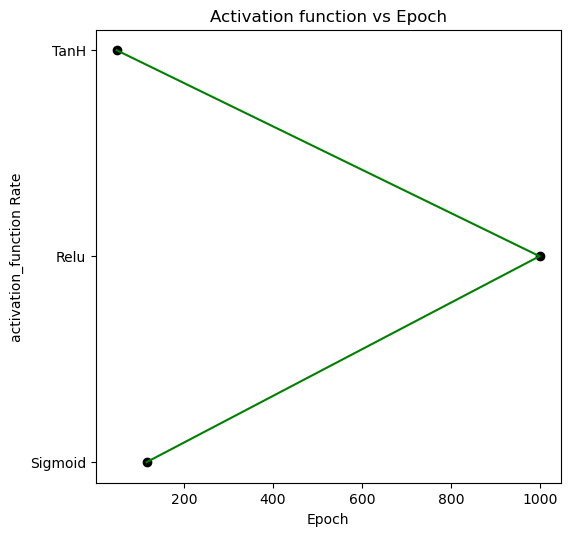

In [75]:
# Plot the Learning Rate vs the number of Epochs
plt.figure(figsize=(6,6), dpi=100)

plt.plot( df_plot_activation_function['n_epoch'], df_plot_activation_function['activation_function'], c='g')
plt.scatter(df_plot_activation_function['n_epoch'], df_plot_activation_function['activation_function'], c='k')

plt.xlabel("Epoch")
plt.ylabel("activation_function Rate")
plt.title('Activation function vs Epoch')
plt.show()

### Activation function vs Number of Epochs vs Accuracy

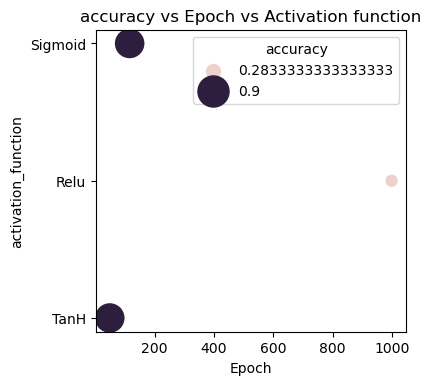

In [76]:
# Plot the Number of epochs vs the accuracy vs the Learning Rate
plt.figure(figsize=(4,4), dpi=100)

sns.scatterplot(data=df_plot_activation_function,x="n_epoch", y="activation_function",hue="accuracy",size="accuracy",sizes=(100, 500))

plt.xlabel("Epoch")
plt.ylabel("activation_function")
plt.title('accuracy vs Epoch vs Activation function')
plt.show()

In [77]:
df_plot_activation_function

,activation_function,n_epoch,accuracy,mean_error
0,Sigmoid,116,0.900000,0.100000
1,Relu,999,0.283333,0.716667
2,TanH,49,0.900000,0.100000
